In [ ]:
import matplotlib.pyplot as plt
import time
import tensorflow as tf

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# Part a: Basic CNN
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

basic_cnn = build_cnn()
basic_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the basic CNN
start_time = time.time()
# history_basic = basic_cnn.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
# each epoch takes really long time to train, I limit it down to 20 to save time
history_basic = basic_cnn.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
training_time_basic = time.time() - start_time

# Results
print("Basic CNN Training Time: {:.2f} seconds".format(training_time_basic))
print("Basic CNN Final Accuracy: {:.2f}%".format(history_basic.history['val_accuracy'][-1] * 100))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3882 - loss: 1.6860 - val_accuracy: 0.5686 - val_loss: 1.2078
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5960 - loss: 1.1481 - val_accuracy: 0.6369 - val_loss: 1.0426
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6543 - loss: 0.9845 - val_accuracy: 0.6609 - val_loss: 0.9817
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6904 - loss: 0.8934 - val_accuracy: 0.6721 - val_loss: 0.9569
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7176 - loss: 0.8210 - val_accuracy: 0.6642 - val_loss: 0.9863
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7354 - loss: 0.7598 - val_accuracy: 0.6906 - val_loss: 0.9021
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7535 - loss: 0.7062 - val_accuracy: 0.6976 - val_loss: 0.9012
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7686 - loss: 0.6598 -

In [ ]:
# Part b: Extended CNN
def build_extended_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),  # Additional layer
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

extended_cnn = build_extended_cnn()
extended_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the extended CNN
start_time = time.time()
# history_extended = extended_cnn.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
history_extended = extended_cnn.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
training_time_extended = time.time() - start_time

# Report results
print("Extended CNN Training Time: {:.2f} seconds".format(training_time_extended))
print("Extended CNN Final Accuracy: {:.2f}%".format(history_extended.history['val_accuracy'][-1] * 100))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3526 - loss: 1.7426 - val_accuracy: 0.5552 - val_loss: 1.2347
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5890 - loss: 1.1541 - val_accuracy: 0.6187 - val_loss: 1.0910
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6682 - loss: 0.9496 - val_accuracy: 0.6786 - val_loss: 0.9361
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7086 - loss: 0.8293 - val_accuracy: 0.6633 - val_loss: 0.9707
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7417 - loss: 0.7362 - val_accuracy: 0.6986 - val_loss: 0.8723
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7642 - loss: 0.6741 - val_accuracy: 0.6974 - val_loss: 0.8713
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7848 - loss: 0.6131 - val_accuracy: 0.7024 - val_loss: 0.8860
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8042 - loss: 0.5561 - 

Basic CNN Model Size: 167562 parameters
Extended CNN Model Size: 160202 parameters


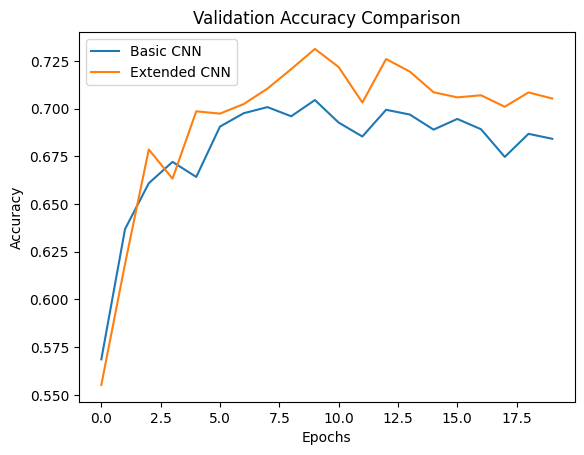

In [ ]:
# Compare results
print("Basic CNN Model Size: {} parameters".format(basic_cnn.count_params()))
print("Extended CNN Model Size: {} parameters".format(extended_cnn.count_params()))

# Plot accuracy curves
plt.plot(history_basic.history['val_accuracy'], label='Basic CNN')
plt.plot(history_extended.history['val_accuracy'], label='Extended CNN')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()